In [1]:
import requests
import json
import pandas as pd
from datetime import datetime, time
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [12]:
def retrieve_and_format(url,
                        set_parameters=True,
                        parameters={'fsym':'ETH','tsym':'USD','limit':30},
                        include_api=False,
                       api_code='bcc5f1ac54b21afbf2d6fe6dc7426da0044ff9691c7b0d29920fad88fbd06279'):
    
    if set_parameters == True and include_api == False:
        response = requests.get(url, params=parameters)
    elif set_parameters == True and include_api == True:
        response = requests.get(url+"api_key="+api_code,
                             params=parameters)
    else:
        response = "N/A"
        
    data_json = response.json().get('Data')
    df = pd.io.json.json_normalize(data_json, record_path = ['Data'])
    
    time_formatted = []
    for i, day in enumerate(df['time']):
        time_formatted.append(datetime.fromtimestamp(day))
    
    df['time_formatted']=time_formatted
    df = df.drop('time', axis=1)
    
    return df
        
        
    
    

In [27]:
eth_df = retrieve_and_format(url="https://min-api.cryptocompare.com/data/v2/histoday")
btc_df = retrieve_and_format(url ="https://min-api.cryptocompare.com/data/v2/histoday",
                            parameters={'fsym':'BTC','tsym':'USD','limit':30})

In [140]:
eth_df

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,time_formatted,price_change,daily_return
0,3669.37,3536.08,3588.20,261572.12,9.440188e+08,3562.84,direct,,2021-10-08 01:00:00,-25.36,-0.706761
1,3633.84,3539.30,3562.84,135476.06,4.864370e+08,3576.40,direct,,2021-10-09 01:00:00,13.56,0.380595
2,3604.88,3409.77,3576.40,194957.07,6.859318e+08,3416.49,direct,,2021-10-10 01:00:00,-159.91,-4.471256
3,3622.59,3374.50,3416.49,261644.17,9.244874e+08,3544.14,direct,,2021-10-11 01:00:00,127.65,3.736291
4,3548.55,3404.55,3544.14,302081.99,1.052426e+09,3490.61,direct,,2021-10-12 01:00:00,-53.53,-1.510381
5,3613.53,3413.15,3490.61,280470.44,9.830411e+08,3607.55,direct,,2021-10-13 01:00:00,116.94,3.350131
6,3826.21,3589.52,3607.55,394599.77,1.472924e+09,3791.23,direct,,2021-10-14 01:00:00,183.68,5.091544
7,3902.04,3735.27,3791.23,381684.12,1.458863e+09,3868.16,direct,,2021-10-15 01:00:00,76.93,2.029157
8,3968.29,3804.18,3868.16,256819.08,9.959726e+08,3829.61,direct,,2021-10-16 01:00:00,-38.55,-0.996598
9,3918.06,3651.37,3829.61,275172.94,1.045897e+09,3846.66,direct,,2021-10-17 01:00:00,17.05,0.445215


In [31]:
print(max(btc_df.time_formatted))
print(min(btc_df.time_formatted))


2021-11-07 00:00:00
2021-10-08 01:00:00


In [32]:
btc_df['price_change'] = btc_df['close']-btc_df['open']
btc_df['daily_return']=btc_df['price_change']/btc_df['open']*100
eth_df['price_change'] = eth_df['close']-eth_df['open']
eth_df['daily_return']=eth_df['price_change']/eth_df['open']*100

In [33]:
btc_df['time_formatted']==eth_df['time_formatted']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
Name: time_formatted, dtype: bool

In [112]:
daily_return_df = pd.DataFrame(data={'time_formatted':eth_df['time_formatted'],'eth':eth_df['daily_return'],'btc':btc_df['daily_return']})

In [113]:
daily_return_df.head()

,time_formatted,eth,btc
0,2021-10-08 01:00:00,-0.706761,0.284537
1,2021-10-09 01:00:00,0.380595,1.888347
2,2021-10-10 01:00:00,-4.471256,-0.487192
3,2021-10-11 01:00:00,3.736291,5.116175
4,2021-10-12 01:00:00,-1.510381,-2.587706


In [114]:
daily_return_df=pd.melt(daily_return_df, id_vars=['time_formatted'],value_vars=['eth','btc'],var_name='Cryptocurrency',
        value_name='daily_return')


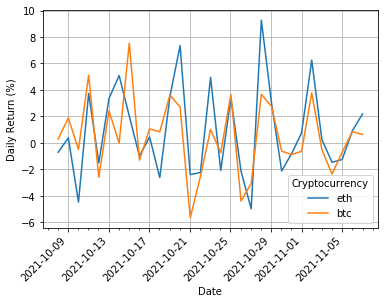

In [116]:
ax=sns.lineplot(data=daily_return_df, x='time_formatted',y='daily_return',hue='Cryptocurrency',
            markers=True)
ax.grid(True)
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.set(xlabel='Date', ylabel='Daily Return (%)')
plt.show()


In [138]:
last_day_price = btc_df['close'][btc_df['time_formatted']==max(btc_df['time_formatted'])].values
first_day_price = btc_df['open'][btc_df['time_formatted']==min(btc_df['time_formatted'])].values

monthly_return = (last_day_price-first_day_price)/first_day_price*100
print(monthly_return)

[15.11225138]


In [139]:
last_day_price = eth_df['close'][eth_df['time_formatted']==max(eth_df['time_formatted'])].values
first_day_price = eth_df['open'][eth_df['time_formatted']==min(eth_df['time_formatted'])].values

monthly_return = (last_day_price-first_day_price)/first_day_price*100
print(monthly_return)

[28.76679115]


In [141]:
print("Mean:",statistics.mean(eth_df['daily_return']))
print("Median:",statistics.median(eth_df['daily_return']))
print("Standard Deviation:",statistics.stdev(eth_df['daily_return']))

Mean: 0.8756219437966722
Median: 0.38059525547035356
Standard Deviation: 3.456912405185372


In [142]:
print("Mean:",statistics.mean(btc_df['daily_return']))
print("Median:",statistics.median(btc_df['daily_return']))
print("Standard Deviation:",statistics.stdev(btc_df['daily_return']))

Mean: 0.4938461632284561
Median: 0.2845367202379641
Standard Deviation: 2.84270021753125


Q2

In [41]:
blkch_df = retrieve_and_format(url ="https://min-api.cryptocompare.com/data/blockchain/histo/day?",
                              parameters = {'fsym':'BTC','limit':30},
                              include_api=True)


,id,symbol,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply,time_formatted
0,1182,BTC,863850154,902393198,448446,986355,280028,676709696,25022,14.299374,704141,1.184813e+08,1.989305e+13,721.126050,1460428,18838387,2021-10-08 01:00:00
1,1182,BTC,864373308,902800970,407772,1017910,246189,676955885,20336,12.982893,704291,1.485635e+08,1.989305e+13,575.107383,1289836,18839400,2021-10-09 01:00:00
2,1182,BTC,864734798,903158002,357032,803883,211506,677167391,18829,13.268340,704450,1.600303e+08,1.989305e+13,533.898734,881602,18840318,2021-10-10 01:00:00
3,1182,BTC,865216153,903597230,439228,1017932,280184,677447575,26252,15.578517,704596,1.460719e+08,1.989305e+13,584.917241,1266067,18841237,2021-10-11 01:00:00
4,1182,BTC,865634931,904042163,444935,962449,274155,677721730,25968,12.809286,704730,1.325145e+08,1.989305e+13,644.759398,1312661,18842187,2021-10-12 01:00:00
5,1182,BTC,866129327,904497070,454907,1004822,288916,678010646,24420,11.271385,704899,1.672853e+08,1.989305e+13,510.744048,1107308,18843225,2021-10-13 01:00:00
6,1182,BTC,866594016,904949500,452431,1002358,282383,678293029,27546,9.706911,705036,1.351584e+08,1.989305e+13,632.147059,1339773,18844050,2021-10-14 01:00:00
7,1182,BTC,867000124,905431719,482219,1032014,297746,678590775,30306,12.927776,705177,1.403021e+08,1.989305e+13,608.971429,1296617,18844943,2021-10-15 01:00:00
8,1182,BTC,867418219,905880782,449067,955334,270052,678860827,23402,10.886584,705310,1.351250e+08,1.989305e+13,632.303030,1295533,18845693,2021-10-16 01:00:00
9,1182,BTC,867813821,906257864,377082,839443,215883,679076710,19552,15.007380,705470,1.607155e+08,1.989305e+13,531.622642,903351,18846706,2021-10-17 01:00:00


In [44]:
blkch_df_price=pd.concat([btc_df, blkch_df], join="outer", sort=False, axis=1)

In [48]:
blkch_df_price = blkch_df_price.dropna()

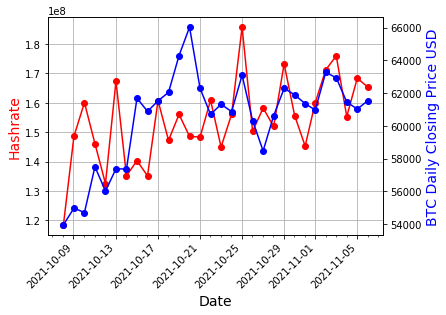

In [89]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.grid(True)
# make a plot
ax.plot(blkch_df_price.time_formatted, blkch_df_price.hashrate, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
ax.tick_params(axis='x', rotation=45)
# set y-axis label
ax.set_ylabel("Hashrate",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(blkch_df_price.time_formatted, blkch_df_price["close"],color="blue",marker="o")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax2.set_ylabel("BTC Daily Closing Price USD",color="blue",fontsize=14)
plt.setp( ax.xaxis.get_majorticklabels(), ha="right" )
plt.show()

In [50]:
blkch_df_price['close'].corr(blkch_df_price['hashrate'])

0.4432972402334995